# 30 Day Map Challenge

Plan: Map the extent and ground ice levels of the permafrost areas in Canada

Setting up the notebook

In [23]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

%matplotlib inline
px.defaults.width = 1300
px.defaults.height = 800

Setting the working directory

In [2]:
os.getcwd()
os.chdir("c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\30 Day Map Challenge\\2023 data\\Day 10")

Importing the permafrost [data](https://open.canada.ca/data/en/dataset/d1e2048b-ccff-5852-aaa5-b861bd55c367)

In [3]:
PermFrst = gpd.read_file("permafrost_pg.shp")
PermFrst.head()

,Shape_Leng,Shape_Area,CLASS_E,PMF_CLASS,PMF_E,ICE_CLASS,ICE_E,WEDGE_SYM,WEDGE_E,PINGO_SYM,PINGO_E,ICE_SYM,MASSIVE_E,geometry
0,9.075544e+04,4.157421e+08,Continuous permafrost with high to medium grou...,C,Continuous permafrost (90% to 100%),M-H,High to medium (10% to >20%),A,Abundant,S,Sparse,A,Abundant,"POLYGON ((-263334.980 2156521.811, -264078.905..."
1,3.235793e+04,6.576772e+07,Continuous permafrost with medium ground ice c...,C,Continuous permafrost (90% to 100%),M,High to medium (10% to >20%),S,Sparse,S,Sparse,None,No,"POLYGON ((153653.076 2730796.142, 151676.619 2..."
2,6.599747e+05,1.535685e+10,Continuous permafrost with medium ground ice c...,C,Continuous permafrost (90% to 100%),M,High to medium (10% to >20%),S,Sparse,S,Sparse,None,No,"POLYGON ((84312.628 2584278.343, 83822.219 258..."
3,3.026780e+06,1.417190e+11,Continuous permafrost with high to medium grou...,C,Continuous permafrost (90% to 100%),M-H,High to medium (10% to >20%),A,Abundant,S,Sparse,A,Abundant,"POLYGON ((-662928.429 2458101.741, -659776.750..."
4,4.230330e+06,3.368161e+11,Extensive discontinuous permafrost with medium...,E,Extensive discontinuous permafrost (50 % to 90%),L-M,Medium to low (20% to <10%),S,Sparse,None,No,None,No,"POLYGON ((-557780.188 1495813.375, -546898.188..."


Creating a column of distinct values custom ordered for each combination of Permafrost Extent and Ground Ice Content

In [53]:
def testpm_df(PermFrst):
    if(PermFrst['PMF_CLASS'] == "C") and (PermFrst['ICE_CLASS'] == "H"):
        return 'a Ch'
    elif(PermFrst['PMF_CLASS'] == "C") and (PermFrst['ICE_CLASS'] == "M-H"):
        return 'b Cmh'
    elif(PermFrst['PMF_CLASS'] == "C") and (PermFrst['ICE_CLASS'] == "M"):
        return 'c Cm'
    elif(PermFrst['PMF_CLASS'] == "C") and (PermFrst['ICE_CLASS'] == "L-M"):
        return 'd Clm'
    elif(PermFrst['PMF_CLASS'] == "C") and (PermFrst['ICE_CLASS'] == "L"):
        return 'e Cl'
    elif(PermFrst['PMF_CLASS'] == "E") and (PermFrst['ICE_CLASS'] == "M"):
        return 'f Em'
    elif(PermFrst['PMF_CLASS'] == "E") and (PermFrst['ICE_CLASS'] == "L-M"):
        return 'g Elm'
    elif(PermFrst['PMF_CLASS'] == "E") and (PermFrst['ICE_CLASS'] == "L"):
        return 'h El'
    elif(PermFrst['PMF_CLASS'] == "E") and (PermFrst['ICE_CLASS'] == "N-L"):
        return 'i Enl'
    elif(PermFrst['PMF_CLASS'] == "S") and (PermFrst['ICE_CLASS'] == "L-M"):
        return 'j Slm'
    elif(PermFrst['PMF_CLASS'] == "S") and (PermFrst['ICE_CLASS'] == "L"):
        return 'k Sl'
    elif(PermFrst['PMF_CLASS'] == "S") and (PermFrst['ICE_CLASS'] == "N-L"):
        return 'l Snl'
    elif(PermFrst['PMF_CLASS'] == "I") and (PermFrst['ICE_CLASS'] == "L-M"):
        return 'm Ilm'
    elif(PermFrst['PMF_CLASS'] == "I") and (PermFrst['ICE_CLASS'] == "L"):
        return 'n Il'
    elif(PermFrst['PMF_CLASS'] == "I") and (PermFrst['ICE_CLASS'] == "N-L"):
        return 'o Inl'
    elif(PermFrst['PMF_CLASS'] == "I") and (PermFrst['ICE_CLASS'] == "N"):
        return 'p In'
    elif(PermFrst['PMF_CLASS'] == "O") and (PermFrst['ICE_CLASS'] == "L-M"):
        return 'q Olm'

PermFrst['test'] = PermFrst.apply(testpm_df, axis = 1)

In [54]:
PermFrst.head()

,Shape_Leng,Shape_Area,CLASS_E,PMF_CLASS,PMF_E,ICE_CLASS,ICE_E,WEDGE_SYM,WEDGE_E,PINGO_SYM,PINGO_E,ICE_SYM,MASSIVE_E,geometry,test
0,9.075544e+04,4.157421e+08,Continuous permafrost with high to medium grou...,C,Continuous permafrost (90% to 100%),M-H,High to medium (10% to >20%),A,Abundant,S,Sparse,A,Abundant,"POLYGON ((-263334.980 2156521.811, -264078.905...",b Cmh
1,3.235793e+04,6.576772e+07,Continuous permafrost with medium ground ice c...,C,Continuous permafrost (90% to 100%),M,High to medium (10% to >20%),S,Sparse,S,Sparse,None,No,"POLYGON ((153653.076 2730796.142, 151676.619 2...",c Cm
2,6.599747e+05,1.535685e+10,Continuous permafrost with medium ground ice c...,C,Continuous permafrost (90% to 100%),M,High to medium (10% to >20%),S,Sparse,S,Sparse,None,No,"POLYGON ((84312.628 2584278.343, 83822.219 258...",c Cm
3,3.026780e+06,1.417190e+11,Continuous permafrost with high to medium grou...,C,Continuous permafrost (90% to 100%),M-H,High to medium (10% to >20%),A,Abundant,S,Sparse,A,Abundant,"POLYGON ((-662928.429 2458101.741, -659776.750...",b Cmh
4,4.230330e+06,3.368161e+11,Extensive discontinuous permafrost with medium...,E,Extensive discontinuous permafrost (50 % to 90%),L-M,Medium to low (20% to <10%),S,Sparse,None,No,None,No,"POLYGON ((-557780.188 1495813.375, -546898.188...",g Elm


Plotting the Map

(-2502437.9586853026, 2805569.307684326, 6175.724160766578, 4015509.569845581)

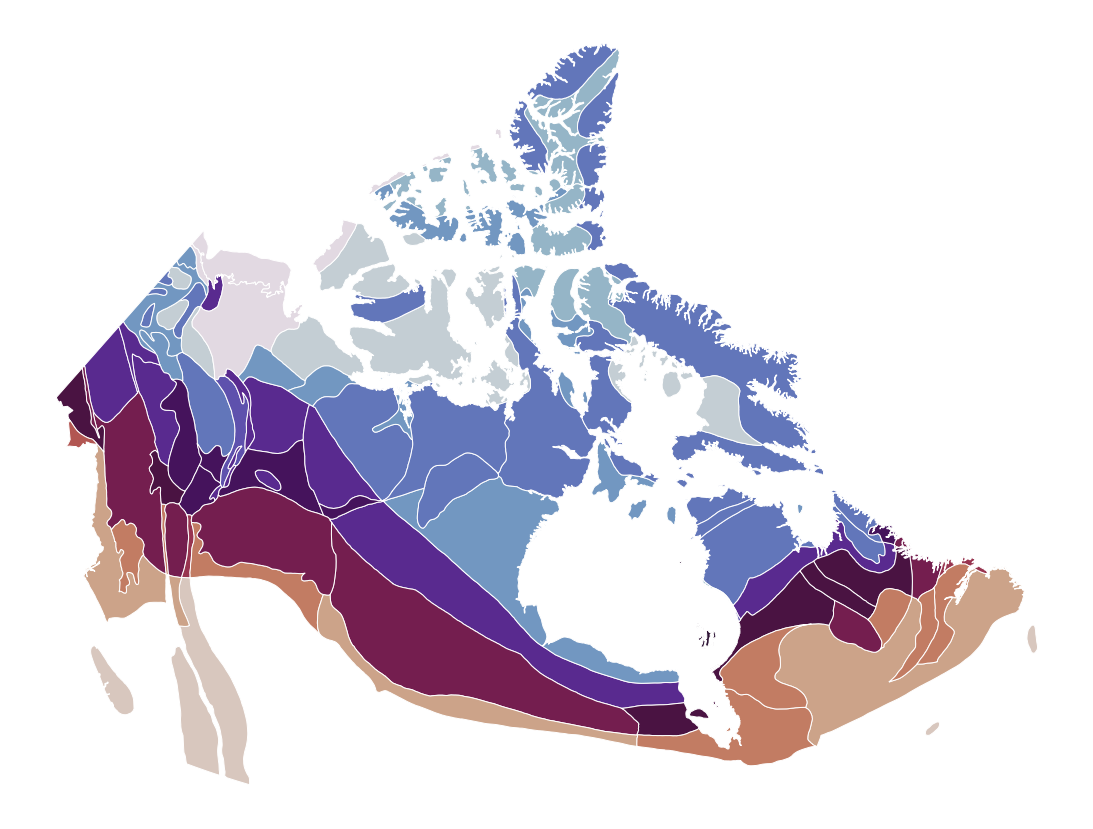

In [62]:
fig, ax = plt.subplots(1, figsize=(25,15))
PermFrst.plot(column="test", 
              cmap="twilight", 
              linewidth=1, 
              ax=ax,
            edgecolor='1', 
            legend = False)
ax.axis('off')